In [1]:
import numpy as np
from scipy.optimize import minimize
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from functions_file import *
from matplotlib.cm import get_cmap
import os
import glob
from matplotlib.patches import Ellipse
import matplotlib.colors as mcolors


In [2]:


# Path to the folder containing the experiment output files
folder_path = 'experiment_outputs/'

# Get the list of all files in the folder
files = glob.glob(os.path.join(folder_path, '*'))

# Loop through the files and delete them
for file in files:
    try:
        os.remove(file)  # Removes the file
        print(f"Deleted: {file}")
    except Exception as e:
        print(f"Error deleting file {file}: {e}")

Deleted: experiment_outputs/mse_data.csv
Deleted: experiment_outputs/real_pos_data.csv
Deleted: experiment_outputs/neuro_pref_dir_data.csv
Deleted: experiment_outputs/pop_vec_data.csv
Deleted: experiment_outputs/alpha_min_data.csv
Deleted: experiment_outputs/alpha_data.csv
Deleted: experiment_outputs/dec_pos_data.csv


In [ ]:
num_runs = 4# Number of runs

experiment_script = "running_experiment.py"  # Experiment script to run
output_dir = "experiment_outputs"
os.makedirs(output_dir, exist_ok=True)

# Run the experiment multiple times and save data in separate files
for run in range(num_runs):
    # Run the experiment
    subprocess.run(["python", experiment_script])
    print(f"Run {run+1} completed")



Run 1 completed
Run 2 completed
Run 3 completed
Run 4 completed


In [13]:
num_runs = 4# Number of runs
output_dir = "experiment_outputs_SAVED-DATA/diff-traj-200s-030425"

# Now, let's load the data and calculate the mean
alpha_file_path = os.path.join(output_dir, "alpha_data.csv")
mse_file_path = os.path.join(output_dir, "mse_data.csv")
alpha_min_file_path = os.path.join(output_dir, "alpha_min_data.csv")
dec_pos_file_path = os.path.join(output_dir, "dec_pos_data.csv")
real_pos_file_path = os.path.join(output_dir, "real_pos_data.csv")
neuro_pref_dir_file_path = os.path.join(output_dir, "neuro_pref_dir_data.csv")
# Read the data from the CSV files
alpha_data_df = pd.read_csv(alpha_file_path)
mse_data_df = pd.read_csv(mse_file_path)
alpha_min_data_df = pd.read_csv(alpha_min_file_path)
dec_pos_data_df = pd.read_csv(dec_pos_file_path)
real_pos_data_df = pd.read_csv(real_pos_file_path)
neuro_pref_dir_data_df = pd.read_csv(neuro_pref_dir_file_path)

Plot neuron distribution

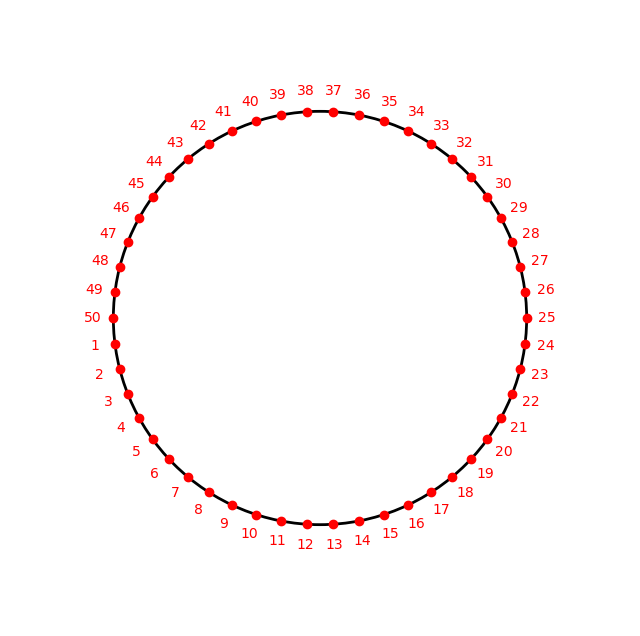

In [14]:
angles = neuro_pref_dir_data_df.iloc[:, 0]  # Adjust angles

# Convert to Cartesian coordinates for plotting
x = np.cos(angles)
y = np.sin(angles)

# Plotting the circle
fig, ax = plt.subplots(figsize=(8,8))
circle = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2)
ax.add_artist(circle)

# Plot the points and add labels
for i, (xi, yi) in enumerate(zip(x, y), start=1):
    ax.plot(xi, yi, 'ro')  # Red dot
    ax.text(xi * 1.1, yi * 1.1, str(i), color='red', fontsize=10, ha='center', va='center')

# Adjust plot limits and appearance
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal', adjustable='datalim')
ax.axis('off')  # Hide axes for a cleaner look

plt.show()

Alpha-MSE correlation

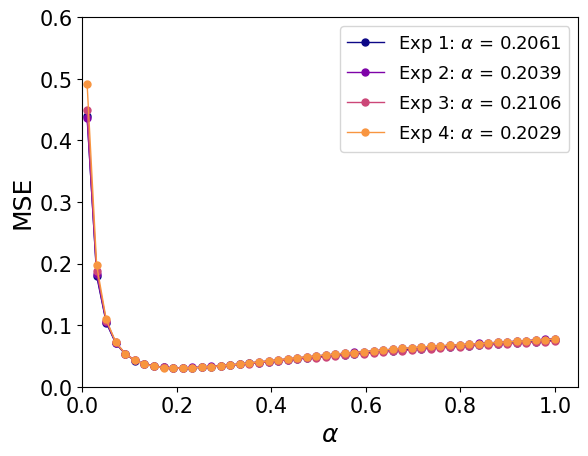

In [15]:
alpha_min_value = np.zeros(num_runs)


# Prepare the figure
fig, ax = plt.subplots(figsize=(6.4, 4.8))

# Define colors for different experiments
experiment_colors = [plt.cm.plasma(i / num_runs) for i in range(num_runs)]

alpha_min_value = np.zeros(num_runs)
# Iterate over experiments (columns)
for i, (alpha_col, mse_col) in enumerate(zip(alpha_data_df.columns, mse_data_df.columns)):
    # Extract data for the current experiment
    alpha_current_exp = alpha_data_df[alpha_col]
    mse_current_exp = mse_data_df[mse_col]  # Using mse_data_df
    alpha_min_value[i] = alpha_min_data_df[alpha_col].iloc[0]  # Assuming one row, using .iloc[0]

    # Scatter plot with colormap for mse values
    color = experiment_colors[i]
    norm = mcolors.Normalize(vmin=np.min(mse_current_exp), vmax=np.max(mse_current_exp))
    plot = ax.plot(alpha_current_exp, mse_current_exp, color=color, label=f'Exp {i+1}: $\\alpha$ = {alpha_min_value[i]:.4f}', marker='o', markersize=5, linestyle='-', linewidth=1)  # Plot points connected by line
 
    
# Add labels, title, and legend
ax.set_xlim(left=0)
#cbar = fig.colorbar(scatter, ax=ax)
ax.set_ylabel('MSE', fontsize = 18)
ax.set_ylim([0,0.6])
ax.set_xlabel(r'$\alpha$', fontsize = 18)
#ax.set_title(r"MSE over $\alpha$") # with covariance ellipses and correlation coefficients")
ax.tick_params(axis='x', labelsize=15)  # x-axis tick labels
ax.tick_params(axis='y', labelsize=15)  # y-axis tick labels
ax.legend(fontsize=13)

plt.show()
    

In [16]:
mean_alpha_overexp = np.mean(alpha_min_value)
print('alpha optimal value, mean over different experiemnts:', mean_alpha_overexp)

var_alpha_overexp = np.var(alpha_min_value)
print('alpha optimal value, variance: ', var_alpha_overexp)

alpha optimal value, mean over different experiemnts: 0.20587835469424956
alpha optimal value, variance:  8.732850097681499e-06
